# Lab 5: Welfare and Elasticities

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
#from IPython.display import display
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn-muted")

## Consumer Surplus

A competitive market is comprised of producers who make goods and services and the consumers who purchase and use them. Through market forces, these consumers and producers agree on a common price for the good or service in question. We will assume that there is no price discrimination and all consumers face the same price. This is typical but not always the case in the real world. Although all consumers face the same market price, consumers are different in how much they individually value a good. We say that consumers have a maximum price that they are willing to pay for a good, and any price marginally higher than this price will dissuade the consumer from participating in the market. This max WTP (willingness to pay) price varies among entities based on their desire for the good, which in turn can be based on how much of the good they already have.

Consider the market for electricity. Among consumers we have entities such as households, commercial buildings, factories, and so on. A factory would likely have a very high WTP for electricity because the opportunity costs for factories to not operate are very high. Capital is expensive, employees still have to be paid, and it is inconvenient to have to stop and start up machinery frequently. Thus, for a factory it is preferable to always have a reliable supply of electricity to continue operations and this need is reflected in the WTP. Contrast this with households, who certainly value having electricity, but should electricity become prohibitively expensive, probably would decide to cut back on usage as the drawbacks of not having electricity aren't as severe compared to the factory above.

## Producer Surplus

Producers experience a similar characteristic. A producer has a minimum price at which it is willing to produce a good based on its costs. Any market price less than this price would dissuade a producer from supplying its good. Again, in the electricity example, we have several power plants that produce electricity, but each inherently does so at different costs. Imagine and contrast the operating costs of a solar farm with a coal plant, or a newer, more efficient natural gas plant versus an older one.

Putting all of these concepts together we arrive at the idea of economic welfare. Suppose electricity costs 10 cents per kWh. On the demand side, imagine a factory who's WTP is 30 cents/kWh. This factory enjoys a consumer surplus of 20 cents/kWh, in other words, it's paying 20 cents less per kWh than what it would be willing to pay. A household might have a WTP of 15 cents/kWh. Here the household's surplus is only 5 cents/kWh. We can also imagine a consumer whose WTP is less than the market price and thus doesn't participate in the market. Imagine for some reason that cryptocurrency prices have dropped to the point that they aren't worth the electricity it takes to mine them. In this case, we might have an idle or non-existent crypto-farm (a place with a lot of computing power) due to electricity being too expensive. On the producer side, maybe we have a solar plant which is operating at the market price, but a natural gas plant that is idling because the price of supplying electricity isn't sufficient to make up for operating costs.

Combining the surpluses of all individual consumers and producers yields the market consumer surplus and producer surplus. As the market price fluctuates, certain comsumers and producers enter and exit the market, and the total surplus varies. Note from the above examples that a consumer is not always an individual, it can be a firm buying from another firm. We now explore further.

## Example

We create a consumer class with a WTP characteristic, and a list of consumers with WTP from 10 to 1. The binary function `demand` indicates whether the consumer participates in the market at a given price or not.

In [2]:
class Consumer:
    def __init__(self, WTP):
        self.WTP = WTP
    def demand(self, price):
        if price <= self.WTP:
            return 1
        else:
            return 0
    def surplus(self, price):
        if price <= self.WTP:
            return self.WTP - price
        else:
            return 0
        
consumers = [Consumer(x) for x in range(10,0,-1)]

print([x.demand(6) for x in consumers])

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


For a market price of 6, we have 5 consumers who participate and 5 who don't. Now let's make a matrix of the lists of participants for each market price between 1 and 10.

In [3]:
for price in range(10,0,-1):
    print([x.demand(price) for x in consumers])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Notice the vague resemblance to a downward-sloping demand curve. The left-most consumer, with a WTP of 10, always participates for these prices. The right-most consumer only participates at a market price of 1. Now lets try and find participation for each price point, starting at 10.

In [4]:
print("Market Price:", "Market Participants")
print("")
for price in range(10,0,-1):
    if price == 10:
        print(str(price) + ":", sum([x.demand(price) for x in consumers]))
    else:
        print(str(price) + ": ", sum([x.demand(price) for x in consumers]))

Market Price: Market Participants

10: 1
9:  2
8:  3
7:  4
6:  5
5:  6
4:  7
3:  8
2:  9
1:  10


Here, each number represents the total number of market participants as the market price *decreases* starting from 10. Notice as the price decreases, participation increases in this demand case. Now lets find actual surplus.

In [5]:
for price in range(10,0,-1):
    print([x.surplus(price) for x in consumers])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[4, 3, 2, 1, 0, 0, 0, 0, 0, 0]
[5, 4, 3, 2, 1, 0, 0, 0, 0, 0]
[6, 5, 4, 3, 2, 1, 0, 0, 0, 0]
[7, 6, 5, 4, 3, 2, 1, 0, 0, 0]
[8, 7, 6, 5, 4, 3, 2, 1, 0, 0]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


Instead of printing a binary 1 or 0 indicating market participation, we've displayed each participant's actual surplus value. Similarly, let's find total surplus per price point.

In [6]:
print("Market Price:", "Consumer Surplus")
print("")
for price in range(10,0,-1):
    if price == 10:
        print(str(price) + ":", sum([x.surplus(price) for x in consumers]))
    else:
        print(str(price) + ": ", sum([x.surplus(price) for x in consumers]))

Market Price: Consumer Surplus

10: 0
9:  1
8:  3
7:  6
6:  10
5:  15
4:  21
3:  28
2:  36
1:  45


Clearly there must be an opposite "force" at play here, otherwise all prices would converge to 0 as consumers maximize their surplus (more on maximization later). Naturally, we must also consider the producers who sell their product to the consumers. We essentially repeat the exercise above, but now instead of a consumer class with individual willingness to pay, we have a producer class with some minimal market price at which production can occur.

In [7]:
class Producer:
    def __init__(self, WTA):
        self.WTA = WTA
    def supply(self, price):
        if price >= self.WTA:
            return 1
        else:
            return 0
    def surplus(self, price):
        if price >= self.WTA:
            return price - self.WTA
        else:
            return 0
        
producers = [Producer(x) for x in range(1,11)]

for price in range(10,0,-1):
    print([x.surplus(price) for x in producers])

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[8, 7, 6, 5, 4, 3, 2, 1, 0, 0]
[7, 6, 5, 4, 3, 2, 1, 0, 0, 0]
[6, 5, 4, 3, 2, 1, 0, 0, 0, 0]
[5, 4, 3, 2, 1, 0, 0, 0, 0, 0]
[4, 3, 2, 1, 0, 0, 0, 0, 0, 0]
[3, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Looks familiar, but with an opposite slope! Here we've captured the idea of producer surplus. At a market price of 10, the leftmost producer is very happy with a surplus of 9, as in this case that producer is actually able to produce and sell at a price of 1 but is able to operate at a price of 10.

## Some Thoughts

Before we continue, let's take a moment to think about the meaning and significance of our findings. Firms that can produce at lower market prices than their peers seem to be better off in the sense that they enjoy higher surplus. This minimum production price is based on the costs of operation the firm experiences, so naturally it seems that firms that can operate at lower costs do better. Certainly, if market prices decrease, more inefficent firms would be the first to shut down while these low operating cost firms continue to do business. This idea is very important in economics: Firms that can reduce their costs are rewarded with higher surplus. This is pretty much how society advances, at least in an economics context. Production methods continually to improve, and less efficient firms must either follow suit or shut down as prices decrease, to the benefit of consumers.

However, what would the equivalent be for the consumer side of things? We've discussed the idea of willingness to pay, and initially it might seem that in our perfectly-competitive market environment, only the consumers who most need a good or service will be the first to get it, as their WTP is the highest. We might think that resources are efficiently allocated in this way. Most of the time this is likely the case, but we've made an assumption while reaching this conclusion; an assumption that doesn't necessarily hold. We have assumed that a person with high willingness to pay also has at least an equally high *ability* to pay. In reality, this might not be the case. A hungry person might have high WTP for a serving of food, but if this person lacks the means to pay for this food, his willingness to pay won't do him much good. In this scenario, our earlier exercise reflects willingness to pay with a simultaneous ability to pay as well. While this week isn't about the ethics of certain types of markets and whether they achieve their goals, it's important to keep in mind that in these ideal exercises, an efficient economy with rational pricing should reflect consumers' willingness to pay, whereas in reality this might not actually be the case.

## Note on the Demand and Supply Curves

As pointed out above, the matrix we saw with rows of surpluses and columns of prices resembles the demand curve in the sense that we can see a diagonal line separating participants from non-participants. This is no coincidence. This idea is essentially what the demand and supply curves depict, except that due to there usually being many participants in a market, we simplify the concept to a continuous curve as opposed to a set of discrete values. This is helpful not only for visualization, but as we will soon see we can use these curves to find rates of change, which will prove to be useful as well.

Earlier we had a matrix of each individual's surplus at each price point, and the overall surplus at each price point. Notice how as the price decreased, surplus increased. Let's see this exact same concept illustrated on a familiar demand curve. Take a few moments to adjust the slider controlling the market price to see how consumer surplus behaves.

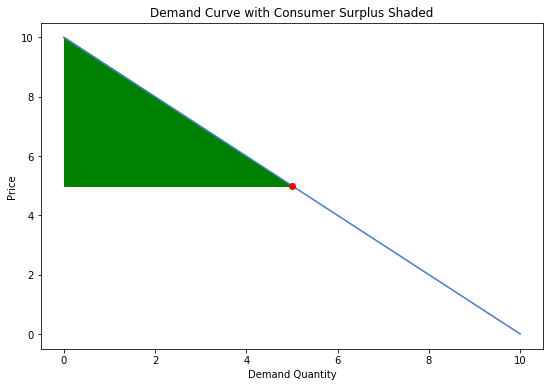

Consumer surplus is equal to: 15


In [8]:
def demand(price):
    p = sympy.Symbol("p")
    consumers = [Consumer(x) for x in range(0,11)]
    demand_equation = 10 - p
    prices = [x for x in range(0,11)]
    demand_Q = [demand_equation.subs(p,x) for x in prices]
    
    plt.figure(figsize = [9,6])
    plt.plot(prices, demand_Q)
    plt.plot(demand_equation.subs(p,price), price, 'ro')
    
    triangle1 = patches.Polygon([[demand_equation.subs(p,price),price], [0,price], [0,10]], True, color='g')
    current_axis = plt.gca()
    current_axis.add_patch(triangle1)
    
    plt.xlabel("Demand Quantity")
    plt.ylabel("Price")
    plt.title("Demand Curve with Consumer Surplus Shaded")
    plt.show()
    print("Consumer surplus is equal to: "+str(sum([person.surplus(price) for person in consumers])))

#slider1 = widgets.IntSlider(min=1, max=10, step=1, value=5)
#display(widgets.interactive(demand, price=slider1))
demand(5)

Producer surplus with the supply curve works exactly the same way but mirrored to reflect the fact that producers gain surplus from higher prices instead of lower.

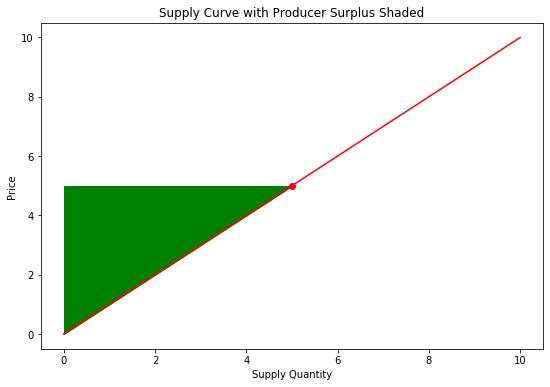

Producer surplus is equal to: 10


In [9]:
def supply(price):
    p = sympy.Symbol("p")
    producers = [Producer(x) for x in range(1,11)]
    supply_equation = p
    prices = [x for x in range(0,11)]
    supply_Q = [supply_equation.subs(p,x) for x in prices]
    
    plt.figure(figsize = [9,6])
    plt.plot(prices, supply_Q, 'r')
    plt.plot(supply_equation.subs(p,price), price, 'ro')
    
    triangle1 = patches.Polygon([[supply_equation.subs(p,price),price], [0,price], [0,0]], True, color='g')
    current_axis = plt.gca()
    current_axis.add_patch(triangle1)
    
    plt.xlabel("Supply Quantity")
    plt.ylabel("Price")
    plt.title("Supply Curve with Producer Surplus Shaded")
    plt.show()
    print("Producer surplus is equal to: "+str(sum([person.surplus(price) for person in producers])))

#slider1 = widgets.IntSlider(min=1, max=10, step=1, value=5)
#display(widgets.interactive(supply, price=slider1))
supply(5)

Here we used a demand curve of $10-P$ and a supply curve of $P$. Now explore how the surplus changes with shifts in the curves below. `demandParam` adjusts the intercept of the demand curve, `supplyParam` adjusts the slope of the supply curve.

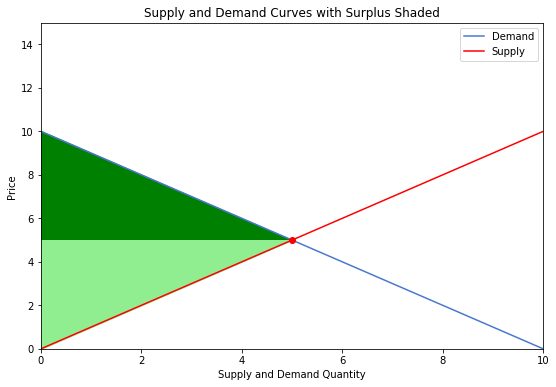

The equilibrium price is 5.0 and equilibrium quantity is 5.0.
The consumer surplus at this equilibrium 12.5000000000000
The producer surplus at this equilibrium 12.5000000000000


In [10]:
def equilibrium(demandParam, supplyParam):
    p = sympy.Symbol("p")
    demand_equation = demandParam - p
    supply_equation = p * (supplyParam / 10)
    price_end = sympy.solve(demand_equation)[0]
    prices = []
    demand_Q = []
    supply_Q = []
    for price in range(0, price_end + 1):
        prices += [price]
        demand_Q += [demand_equation.subs(p,price)]
        supply_Q += [supply_equation.subs(p,price)]
    
    equilibrium_P = sympy.solve(demand_equation-supply_equation)[0]
    equilibrium_Q = demand_equation.subs(p,equilibrium_P)
    
    plt.figure(figsize = [9,6])
    plt.plot(demand_Q,prices, label="Demand")
    plt.plot(supply_Q,prices, 'r', label="Supply")
    plt.legend()
    plt.plot(equilibrium_Q,equilibrium_P, 'ro')
    
    triangle1 = patches.Polygon([[equilibrium_Q,equilibrium_P], [0,equilibrium_P], [0,price_end]], True, color="green")
    triangle2 = patches.Polygon([[equilibrium_Q,equilibrium_P], [0,equilibrium_P], [0,0]], True, color="lightgreen")
    current_axis = plt.gca()
    current_axis.add_patch(triangle1)
    current_axis.add_patch(triangle2)
    
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.title("Supply and Demand Curves with Surplus Shaded")
    plt.ylim(0, 15)
    plt.xlim(0, 10)
    plt.show()
    print("The equilibrium price is "+str(round(equilibrium_P,2))+" and equilibrium quantity is "+str(round(equilibrium_Q,2))+".")
    print("The consumer surplus at this equilibrium "+str((price_end-equilibrium_P)*(equilibrium_Q)*.5))
    print("The producer surplus at this equilibrium "+str((equilibrium_P)*(equilibrium_Q)*.5))

#slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
#slider2 = widgets.IntSlider(min=5, max=15,step=1,value=10)
#display(widgets.interactive(equilibrium, demandParam=slider1, supplyParam=slider2))
equilibrium(10, 10)